In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
X = df[['V5', 'V6', 'V17', 'V19']]
Y = df['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#수동 리서치

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=101).fit(X_train, Y_train)

In [ ]:
predict = model.predict(X_test)

#혼동 행렬 인쇄
print(confusion_matrix(Y_test, predict))

[[56868     7]
 [   31    56]]


In [ ]:
accuracy = accuracy_score(Y_test, predict)
print(accuracy)

0.9993328885923949


In [ ]:
#랜덤 리서치

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
#하이퍼 파라미터
random_search = {
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [2],
    "max_features" : ['auto', 'sqrt'],
    "min_samples_leaf" : [4, 6, 8],
    "min_samples_split" : [5, 6, 7],
    "n_estimators" : [20]
}

In [ ]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator=clf, param_distributions = random_search,
                           n_iter=10, cv=4, verbose=1, random_state=101, n_jobs=-1)
model.fit(X_train, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 6, 7],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [ ]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.954959,0.792665,0.109055,0.033571,20,5,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999175,0.998999,0.998999,0.999157,0.999083,0.000084,3
1,5.658878,0.918488,0.079919,0.003655,20,6,8,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 6, '...",0.999210,0.998964,0.998771,0.999140,0.999021,0.000170,8
2,5.294794,1.063873,0.124921,0.047677,20,7,4,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 7, '...",0.999192,0.998964,0.998982,0.999210,0.999087,0.000114,2
3,4.603747,0.596624,0.104922,0.023295,20,7,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 7, '...",0.999210,0.998982,0.998350,0.999175,0.998929,0.000346,9
4,4.603583,0.651375,0.077444,0.001645,20,5,6,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999192,0.998982,0.998876,0.999210,0.999065,0.000141,6
5,5.304209,1.207224,0.104862,0.029741,20,7,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 7, '...",0.999228,0.998999,0.998999,0.999210,0.999109,0.000110,1
6,4.070313,0.191826,0.080596,0.007426,20,6,8,auto,2,gini,"{'n_estimators': 20, 'min_samples_split': 6, '...",0.999192,0.998982,0.998982,0.999017,0.999043,0.000087,7
7,5.433034,1.106978,0.134211,0.053035,20,5,4,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999175,0.998982,0.998999,0.999140,0.999074,0.000085,5
8,4.789445,0.783920,0.106474,0.030935,20,5,8,sqrt,2,gini,"{'n_estimators': 20, 'min_samples_split': 5, '...",0.999192,0.998982,0.999017,0.999140,0.999083,0.000086,4
9,5.515708,0.787670,0.072246,0.009656,20,7,4,auto,2,entropy,"{'n_estimators': 20, 'min_samples_split': 7, '...",0.998982,0.998999,0.998490,0.999122,0.998898,0.000242,10


<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

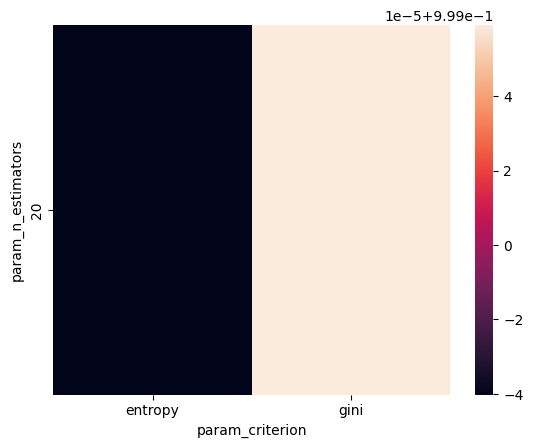

In [ ]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
                       values='mean_test_score',
                       index='param_n_estimators',
                       columns='param_criterion')

sns.heatmap(table)

#entropy가 더 어두운 색. 1에 가깝다 : 점수가 더 높다. 잘 나왔다

In [ ]:
#그리드 리서치

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = {
    "criterion" : ['entropy', 'gini'],
    "max_depth" : [2],
    "max_features" : ['auto', 'sqrt'],
    "min_samples_leaf" : [4, 6, 8],
    "min_samples_split" : [5, 6, 7],
    "n_estimators" : [20]
}

clf_g = RandomForestClassifier()
model = GridSearchCV(estimator=clf_g,
                     param_grid=grid_search,
                     cv=4,
                     n_jobs=1)

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 6, 7], 'n_estimators': [20]})

In [ ]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.953034,0.625581,0.068171,0.010451,entropy,2,auto,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999034,0.999017,0.998666,0.998525,0.998811,0.000221,34
1,5.923380,2.562040,0.177647,0.089173,entropy,2,auto,4,6,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.999034,0.998964,0.999228,0.999105,0.000109,1
2,5.871981,0.812302,0.082518,0.009167,entropy,2,auto,4,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999228,0.998964,0.998982,0.999105,0.999070,0.000106,12
3,6.330166,1.290703,0.105072,0.033286,entropy,2,auto,6,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998982,0.998964,0.998982,0.999105,0.999008,0.000056,19
4,3.740021,0.586093,0.066817,0.013672,entropy,2,auto,6,6,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.998964,0.998964,0.999122,0.999061,0.000100,15
5,3.351323,0.480552,0.064498,0.010160,entropy,2,auto,6,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998824,0.998648,0.998841,0.998455,0.998692,0.000156,36
6,3.395705,0.602085,0.058866,0.001173,entropy,2,auto,8,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.998999,0.998999,0.998806,0.998999,0.000137,22
7,3.268563,0.461894,0.064844,0.013127,entropy,2,auto,8,6,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.999017,0.998964,0.998648,0.998955,0.000196,26
8,3.184154,0.330422,0.064299,0.011111,entropy,2,auto,8,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998771,0.998578,0.998473,0.999140,0.998740,0.000254,35
9,3.166101,0.260948,0.067119,0.014551,entropy,2,sqrt,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.998929,0.998964,0.999210,0.999074,0.000128,11


In [ ]:
predict = model.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(Y_test, predict)
print(accuracy_grid)

0.9987711105649381


In [ ]:
#최고의 파라미터 조합을 확인
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       min_samples_leaf=4, min_samples_split=6,
                       n_estimators=20)

In [ ]:
#다른 데이터셋으로 한 번 더

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

#scipy == 통계, 수학적 계산을 쉽게 해주는 라이브러리.
#균등분포 생성 함수
from scipy.stats import uniform

In [ ]:
distribution

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f8253e74670>,
 'penalty': ['l2', 'l1']}

In [ ]:
iris = load_iris()

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distribution = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distribution, random_state=0)

search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [ ]:
print(f"Best score : {search.best_score_}") #정확도

Best score : 0.9800000000000001


In [ ]:
# 아이리스 = 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
parameter = {'kernel':('linear','rbf'), 'C':[1, 10]}

svc = svm.SVC()

clf = GridSearchCV(svc, parameter) #clf : Classifier
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.9800000000000001

In [ ]:
## 전체 되돌아보기

#머신러닝 훈련의 전체적인 시퀀스
1. 데이터 준비(csv형태의 파일)
2. 데이터 전처리
   -결측치 확인 / 대체
   -이상치 확인 / 제거
   -스케일링
3. train_test_split
4. 적절한 모델 설정
5. 모델 훈련
   -grid_search
   -random_search
   >>최선의 결과 및 파라미터 조합을 찾음
6. 성능 검증 및 4~6번 반복

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/breast_data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape #(행,열)

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#StandardScaler
#MinMaxScaler

#필요없는 열 정리
df = df.drop(['id', 'Unnamed: 32'], axis='columns')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.diagnosis.replace({"M":1, "B":0}, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'Correlation with diagnosis'}>

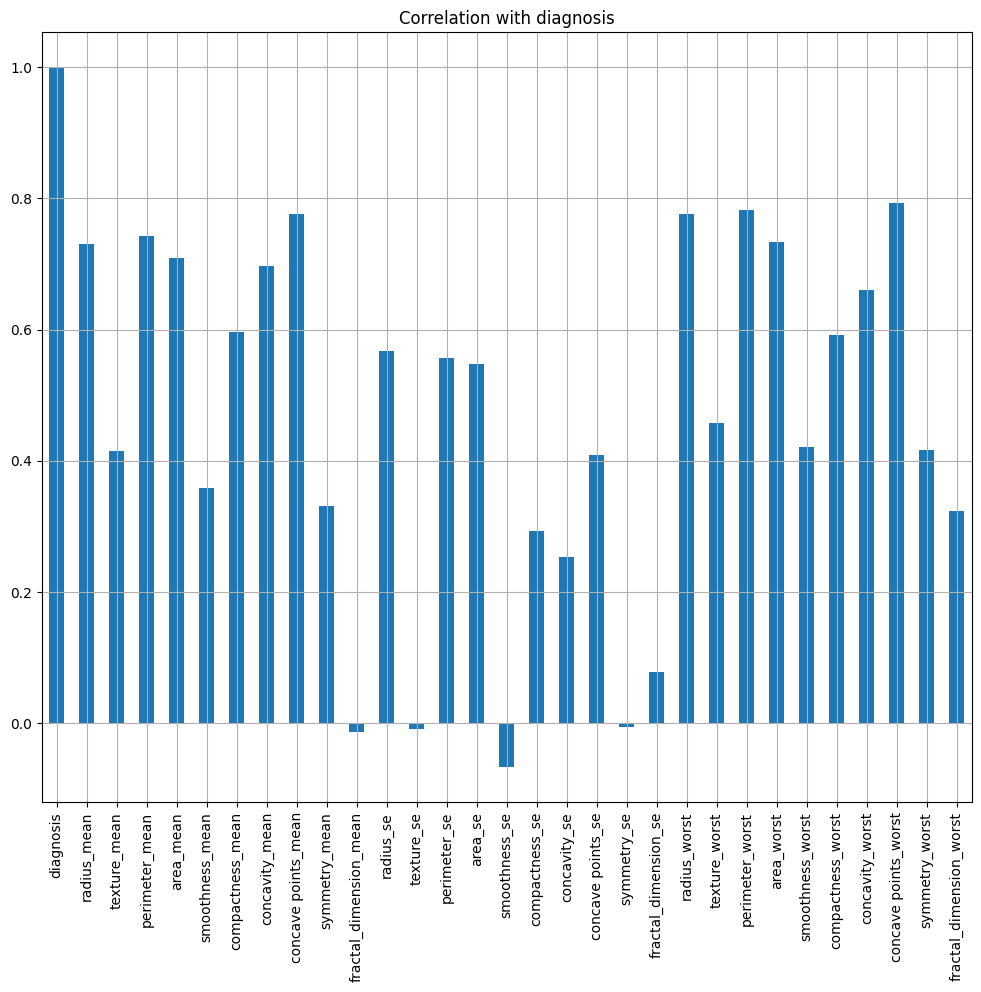

In [ ]:
df.corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title ="Correlation with diagnosis")
#데이터 프레임의 특정 열과 다른 열과의 상관관계를 바 그래프로 표현 (여기선 diagnosis) grid : 격자

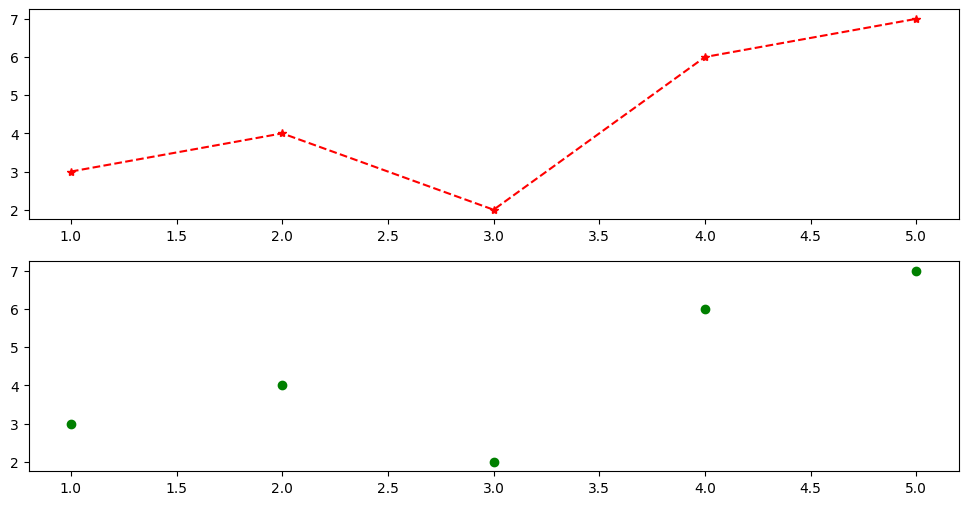

In [ ]:
#시각화 예시 (추후활용용)
x = [1,2,3,4,5]
y = [3,4,2,6,7]

fig, ax = plt.subplots(2, 1, figsize=(12,6)) #fig,ax 는 짝. 시각화 그래프를 (2행 1열)로 표현
ax[0].plot(x, y, c='red', linestyle='--', marker='*') #도화지의 윗부분(2행 중 첫 번째(0번째 행)) 에 그릴 것
ax[1].scatter(x, y, c='green') #c에는 색상 이름이 들어가도 되고 몇 개 색상이 필요한지 들어가도 됨

plt.show() #더 많은 옵션은 matplotlib검색

In [ ]:
## train_test_split

In [ ]:
X=df.drop(['diagnosis'], axis=1)
Y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#모델링

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc_cls = SVC()
svc_cls.fit(X_train, Y_train)

pred_svc = svc_cls.predict(X_test)
accuracy_score(Y_test, pred_svc)

0.9824561403508771

In [ ]:
#그리드 리서치, 랜덤 리서치

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('poly', 'signoid'), 'gamma':('scale', 'auto')}

svc_p = SVC()
svc_g = GridSearchCV(svc_p, parameters)
svc_g.fit(X_train, Y_train)

print(f"Best Params : {svc_g.best_params_}")
print(f"Best Scores : {svc_g.best_scores_}")

In [ ]:
## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNN 분류기
#n_neighbors = 참고할 이웃의 수
#metric = knn분류 시 참고할 평가 지표
knn_cls = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_cls.fit(X_train, Y_train)

pred_knn = knn.cls.predict(X_test)
accuracy = accuracy_score(Y_test, pred_knn)


In [ ]:
#랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

knn_r = KNeighborsClassifier()
parameters = {"n_neighbors" : [1, 3, 9, 10]}
knn_cv = RandomizedSearchCV(knn_r, parameters)

knn_cv.fit(X_train, Y_train)

print(f"Best Params : {knn_cv.best_params_}")
print(f"Best Scores : {knn_cv.best_scores_}")

In [ ]:
## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier()
xgb_cls.fit(X_train, Y_train)

#프레딕트
pred_xgb = xgb_cls.predict(X_test)
accuracy = accuracy_score(X_test, pred_xgb)
print(accuracy)

In [ ]:
##랜더마이즈 서치
params={
    "learning_rate" :[0.05,0.10,0.20,0.25,0.30],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
}

In [ ]:
xbg = XGBClassifier()
random_search = RandomizedSearchCV(xbg, param_distributions=params, n_jobs=-1)
random_search.fit(X_train, Y_train)

In [ ]:
random_search.best_params_

In [ ]:
y_pred_xgb = xbg.predict(X_test)
accuracy_score(Y_test, y_pred_xgb)*100